fixKLL2

version     expl_wt     bw_PBT      L2_con      Result

v1          0.3         1.0         0.01        crisp weights, but low LL in some models (with high bw)

v2          0.2         1.0         0.1         High LL, almost no gap with ablated model (controller not doing much), overregularized

v3          0.2         0.1         0.1         Overregularized, very low LL, one model is fully control-driven

v4          0.2         0.5         0.01        not great weights, not good not bad everything

v5          0.2         1.0         0.01        Just redo v1 with hopefully less variability

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def read_pbt_hparams(config_path):
    # read json
    with open(config_path) as file:            
        config = json.load(file)

    # pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
    #             'model.l2_gen_scale', 'model.l2_con_scale']
    pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 'model.behavior_weight']
    pbt_values = {key:config[key] for key in pbt_keys}

    return pbt_values

name_translation = {
    # 'chewie_09_15': 'Chewie_CO_FF_2016-09-15',
    # 'chewie_09_21': 'Chewie_CO_FF_2016-09-21',
    # 'chewie_10_05': 'Chewie_CO_FF_2016-10-05',
    'chewie_10_07': 'Chewie_CO_FF_2016-10-07',
    # 'mihili_02_03': 'Mihili_CO_FF_2014-02-03',
    # 'mihili_02_17': 'Mihili_CO_FF_2014-02-17',
    # 'mihili_02_18': 'Mihili_CO_FF_2014-02-18',
    # 'mihili_03_07': 'Mihili_CO_FF_2014-03-07',
}

In [62]:
results_folder = '/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/'
# model_name = 'kl1_gauss'
# bs=256
model_name = 'fixKLL2_v4'

fac_dim=8
area='both'

try:
    del(LLs)
    del(R2s)
    del(pbt_df)
except NameError:
    pass

for dataset in name_translation.keys():
    for model in ['band']: #['lfads','band']:
        # for area in ['both','M1','PMd']:
        for fold in range(5):
            # load LLs
            # join path with band_both_8f_kl1_gauss_bs256
            if area == 'both':
                dataset_name = dataset
            else:
                dataset_name = f'{dataset}_{area}'

            dataset_name += f'_cv{fold}'

            # run_name = f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}'
            if fold == 0:
                run_name = f'{model}_{area}_{fac_dim}f_fixKLL2'
            else:
                run_name = f'{model}_{area}_{fac_dim}f_{model_name}'
            path = os.path.join(results_folder, dataset_name, run_name,'LL_diff.csv')
            print(path)
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                df['fold'] = fold
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    LLs = pd.concat([LLs, df])
                except NameError:
                    LLs = df

            # load R2s
            path = os.path.join(results_folder, dataset_name, run_name,'R2_results.csv')
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                df['fold'] = fold
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    R2s = pd.concat([R2s, df])
                except NameError:
                    R2s = df

            # read json:
            config_path = os.path.join(results_folder, dataset_name, run_name,
                            'best_model','params.json')
            pbt_values = read_pbt_hparams(config_path)
            # convert to df
            df = pd.DataFrame(pbt_values, index=[0])
            # add name column
            df['dataset'] = dataset
            df['model'] = model
            df['area'] = area
            df['fold'] = fold
            # join with the previous
            try:
                pbt_df = pd.concat([pbt_df, df])
            except NameError:
                pbt_df = df



LLs

/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/chewie_10_07_cv0/band_both_8f_fixKLL2/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/chewie_10_07_cv1/band_both_8f_fixKLL2_v4/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/chewie_10_07_cv2/band_both_8f_fixKLL2_v4/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/chewie_10_07_cv3/band_both_8f_fixKLL2_v4/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper-slurm/chewie_10_07_cv4/band_both_8f_fixKLL2_v4/LL_diff.csv


,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area,fold
0,0.139246,0.104310,0.047739,0.033676,chewie_10_07,band,both,0
0,0.161584,0.152491,0.058104,0.054334,chewie_10_07,band,both,1
0,0.122216,0.121513,0.041560,0.041062,chewie_10_07,band,both,2
0,0.154505,0.144002,0.056840,0.052405,chewie_10_07,band,both,3
0,0.100457,0.096468,0.031378,0.030429,chewie_10_07,band,both,4


In [63]:
pbt_values

{'model.lr_init': 0.0023094155648313262,
 'model.dropout_rate': 0.11245803207094382,
 'model.train_aug_stack.transforms.0.cd_rate': 0.3652019796537477,
 'model.behavior_weight': 0.24221907091942652}

In [64]:
R2s

,seq2seq from factors,seq2seq from factors no CI,seq2seq from factprs in AD,seq2seq from factors no CI in AD,band behavior,band behavior no CI,band behavior in AD,band behavior no CI in AD,seq2seq from controls,dataset,model,area,fold
0,90.085310,30.939357,85.674944,10.859796,90.232694,28.391010,86.071950,7.753486,52.388594,chewie_10_07,band,both,0
0,87.380306,75.672665,81.950190,69.777512,87.720685,76.076174,81.562908,70.130751,13.745991,chewie_10_07,band,both,1
0,82.693182,81.162424,76.193547,74.203208,83.504209,83.516087,77.874025,77.910031,13.368948,chewie_10_07,band,both,2
0,86.949697,74.313626,81.295886,62.397607,87.236171,75.518787,81.044764,63.590488,22.461954,chewie_10_07,band,both,3
0,86.061868,75.571849,83.735771,69.496112,86.427246,75.933870,83.786998,69.369415,37.410991,chewie_10_07,band,both,4


In [65]:
LLs_pbt = LLs.merge(pbt_df, on=['fold']).merge(R2s, on=['fold'])
LLs_pbt = LLs_pbt.drop(columns=['dataset_y','model_y','area_y']).drop(columns=['dataset_x','model_x','area_x']).drop(columns=['dataset','model','area'])
LLs_pbt = LLs_pbt.drop(columns=['LL_AD','LL_noci_AD','fold']).rename(columns={'model.train_aug_stack.transforms.0.cd_rate':'cd_rate','model.behavior_weight':'behavior_weight'})
LLs_pbt

,LL,LL_noci,model.lr_init,model.dropout_rate,cd_rate,behavior_weight,seq2seq from factors,seq2seq from factors no CI,seq2seq from factprs in AD,seq2seq from factors no CI in AD,band behavior,band behavior no CI,band behavior in AD,band behavior no CI in AD,seq2seq from controls
0,0.139246,0.104310,0.002237,0.103897,0.149846,0.228946,90.085310,30.939357,85.674944,10.859796,90.232694,28.391010,86.071950,7.753486,52.388594
1,0.161584,0.152491,0.000776,0.013270,0.284834,0.027147,87.380306,75.672665,81.950190,69.777512,87.720685,76.076174,81.562908,70.130751,13.745991
2,0.122216,0.121513,0.002725,0.359388,0.194098,0.079217,82.693182,81.162424,76.193547,74.203208,83.504209,83.516087,77.874025,77.910031,13.368948
3,0.154505,0.144002,0.001207,0.041312,0.336497,0.023134,86.949697,74.313626,81.295886,62.397607,87.236171,75.518787,81.044764,63.590488,22.461954
4,0.100457,0.096468,0.002309,0.112458,0.365202,0.242219,86.061868,75.571849,83.735771,69.496112,86.427246,75.933870,83.786998,69.369415,37.410991


# Visualize

IndexError: index 0 is out of bounds for axis 0 with size 0

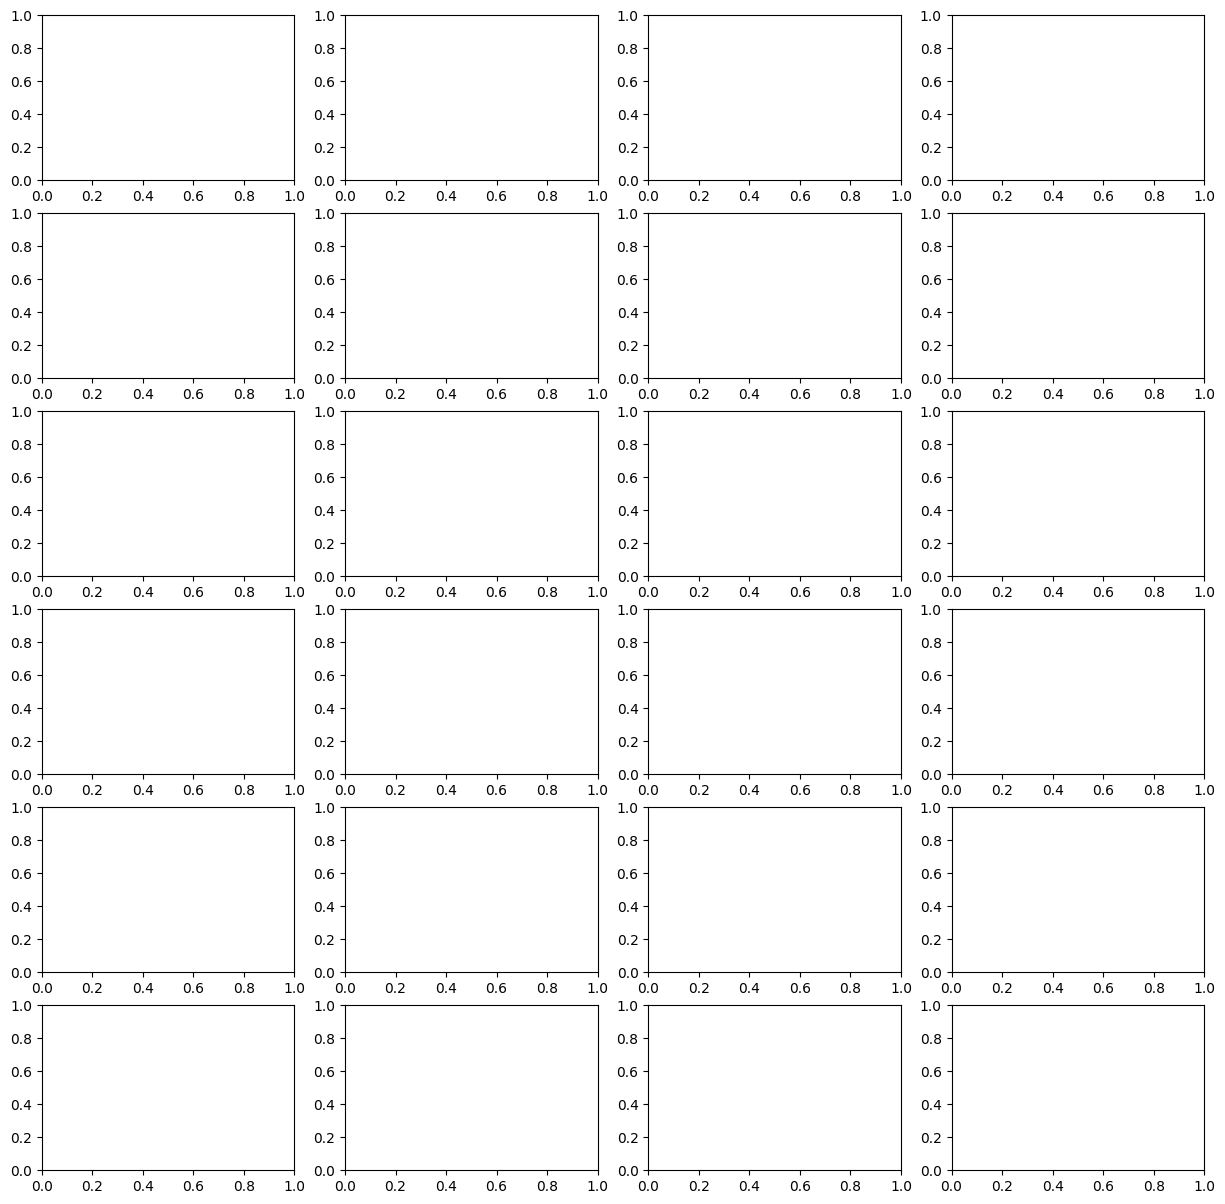

In [50]:
def LLs_barplot(dataset, area, axes):
    # filter by dataset
    df = LLs[(LLs['dataset'] == dataset) & (LLs['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        LL_BAND = df[df['model'] == 'band']['LL'].values[0]
        LL_LFADS = df[df['model'] == 'lfads']['LL'].values[0]
        LL_noci_BAND = df[df['model'] == 'band']['LL_noci'].values[0]
        LL_noci_LFADS = df[df['model'] == 'lfads']['LL_noci'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [LL_BAND, LL_LFADS, LL_noci_BAND, LL_noci_LFADS],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('LL, bits/sec')
    axes.set_ylim([0,0.5])
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4, figsize=(15, 15))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, i%4])

plt.tight_layout()

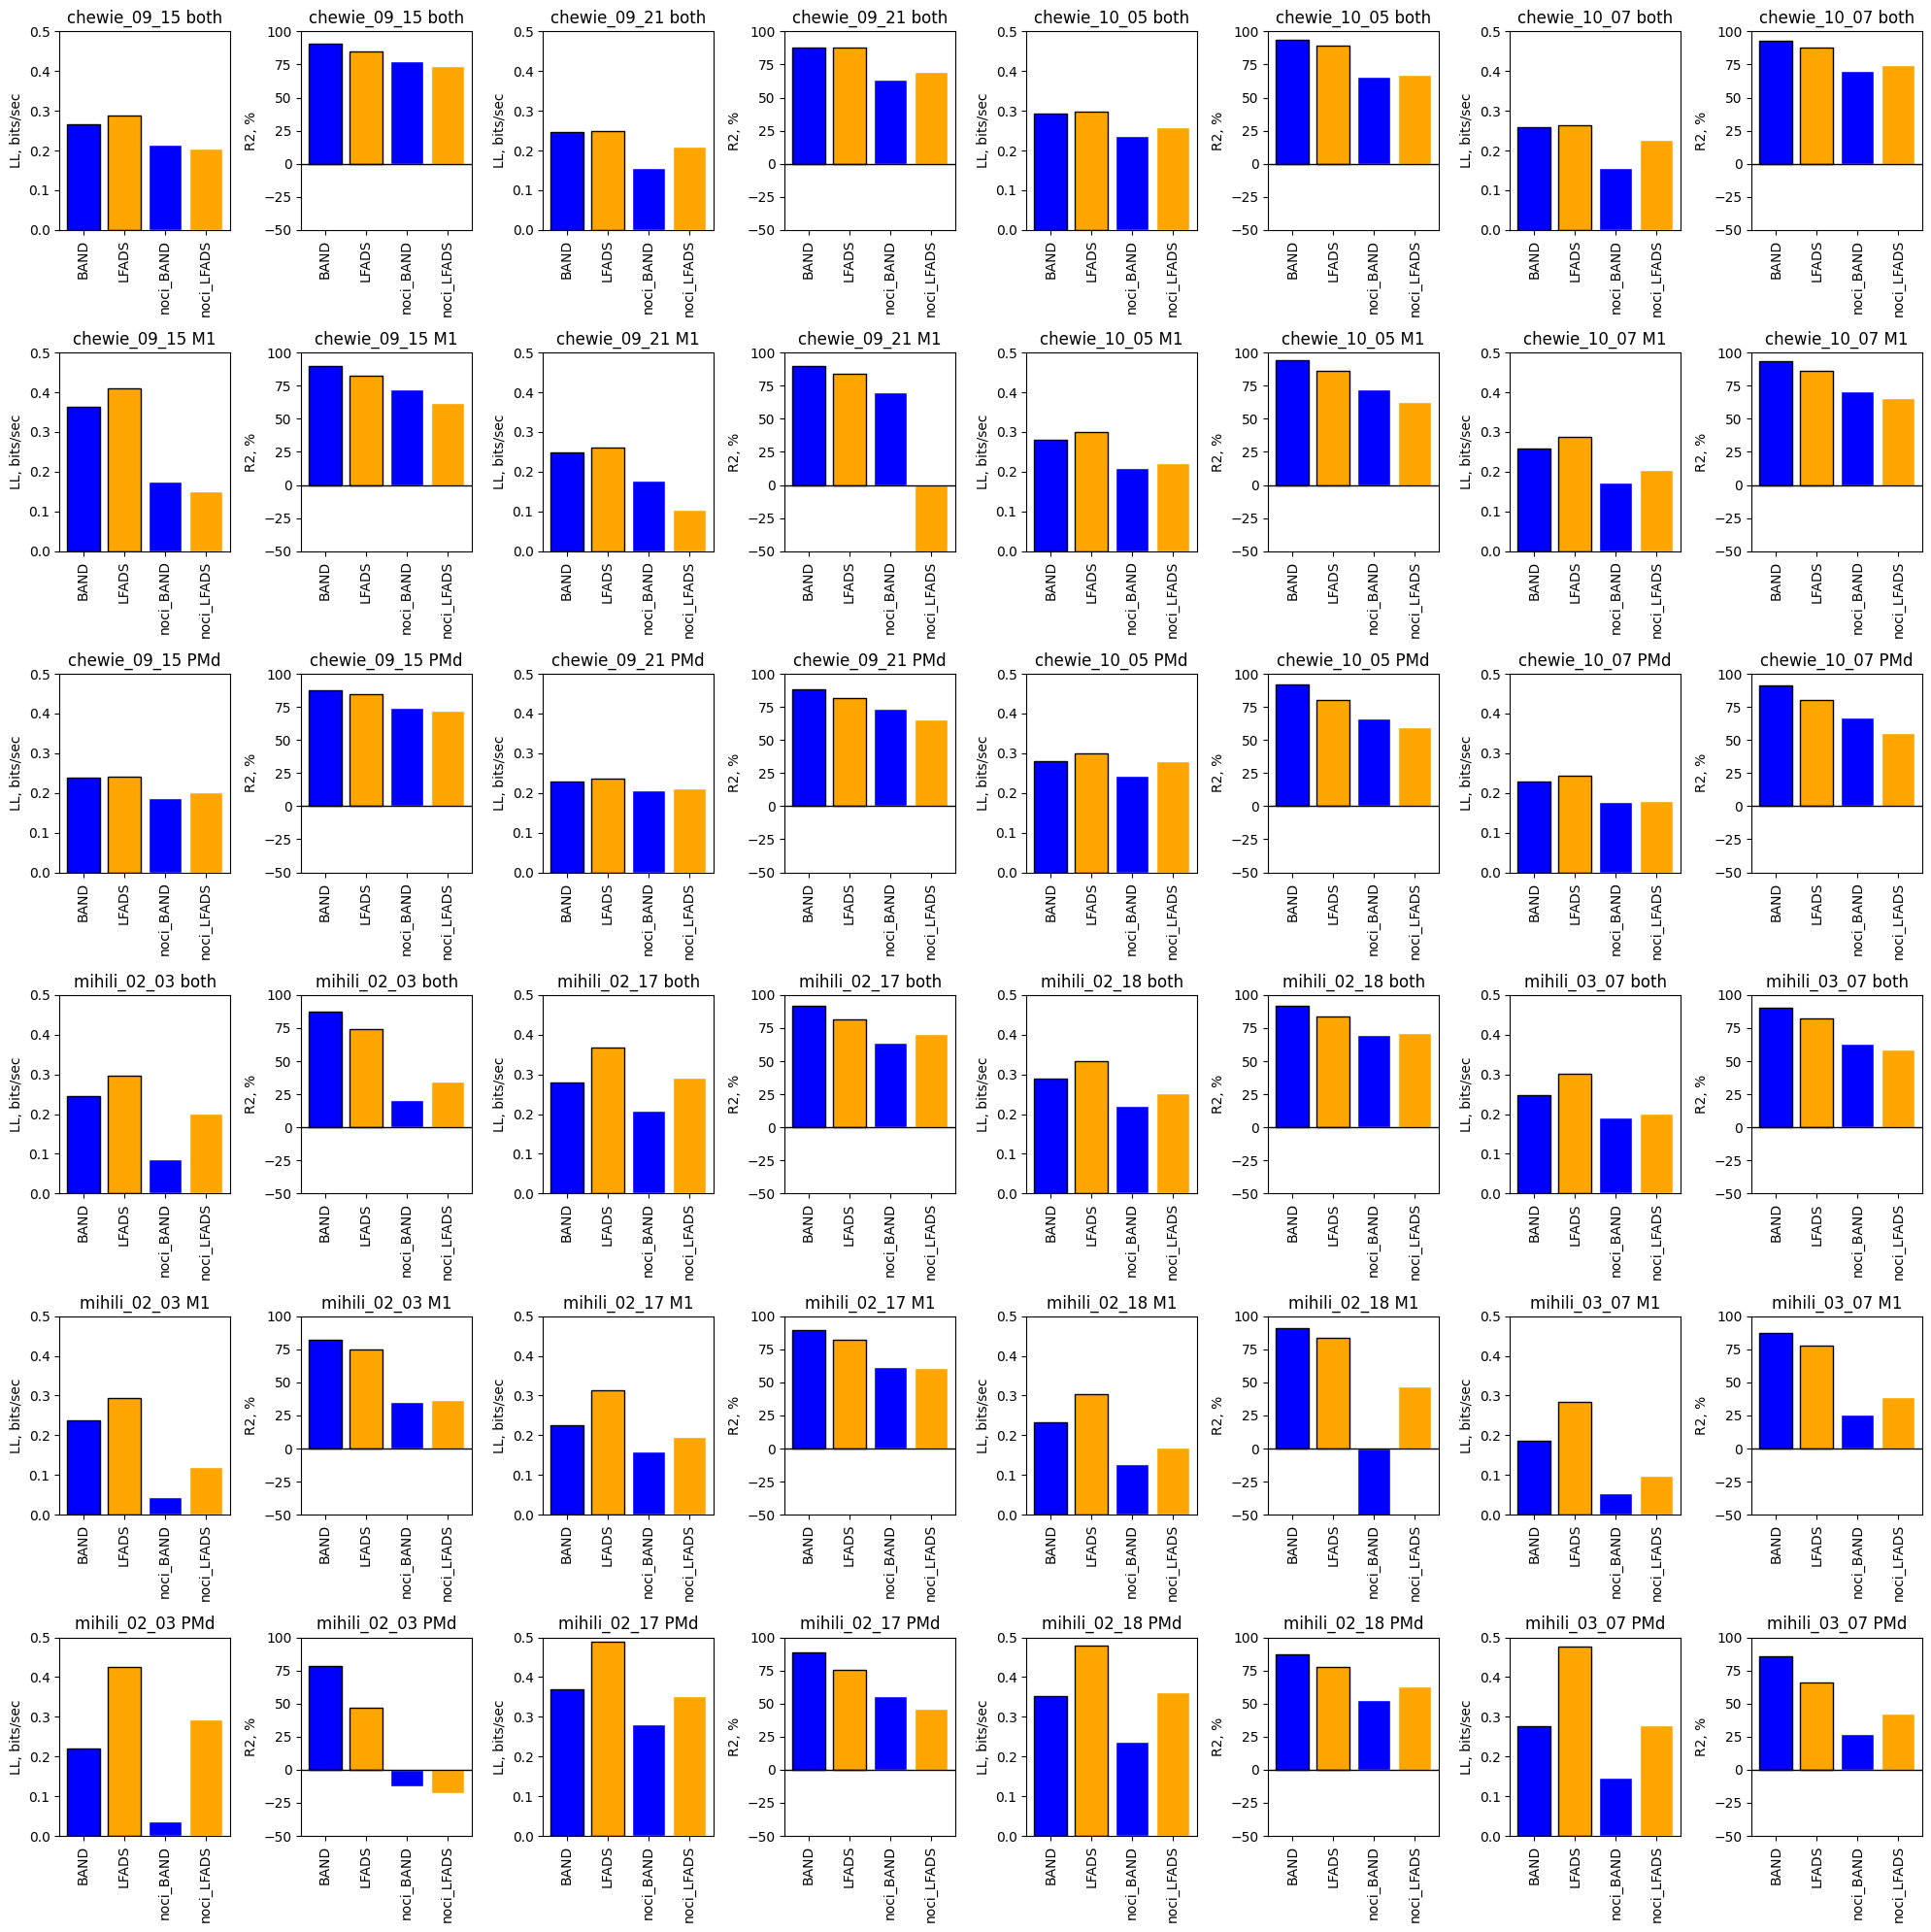

In [ ]:
def R2s_barplot(dataset, area, axes):
    # filter by dataset
    df = R2s[(R2s['dataset'] == dataset) & (R2s['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        R2_BAND = df[df['model'] == 'band']['seq2seq from factors'].values[0]
        R2_LFADS = df[df['model'] == 'lfads']['seq2seq from factors'].values[0]
        R2_BAND_noci = df[df['model'] == 'band']['seq2seq from factors no CI'].values[0]
        R2_LFADS_noci = df[df['model'] == 'lfads']['seq2seq from factors no CI'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [R2_BAND, R2_LFADS, R2_BAND_noci, R2_LFADS_noci],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('R2, %')
    axes.set_ylim([-50,100])
    axes.tick_params(axis='x', rotation=90)
    axes.axhline(0, color='black', linewidth=1)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4*2, figsize=(20, 20))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 0])
        R2s_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 1])

plt.tight_layout()

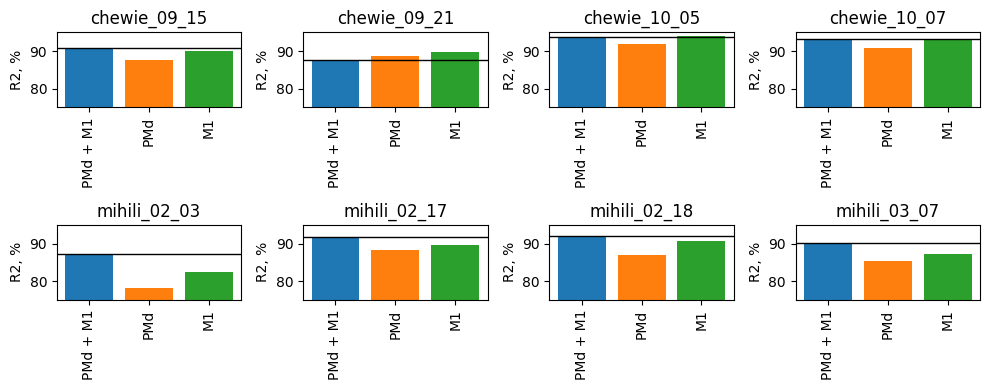

In [7]:
def R2s_across_areas(dataset, model, axes):
    # filter by dataset
    df = R2s[(R2s['dataset'] == dataset) & (R2s['model'] == model)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        R2_both = df[df['area'] == 'both']['seq2seq from factors'].values[0]
        R2_M1 = df[df['area'] == 'M1']['seq2seq from factors'].values[0]
        R2_PMd = df[df['area'] == 'PMd']['seq2seq from factors'].values[0]
        # plot
        axes.bar(['PMd + M1', 'PMd', 'M1'], [R2_both, R2_PMd, R2_M1],
                 color=['C0', 'C1', 'C2'])
        
    axes.axhline(R2_both, color='black', linewidth=1)
    axes.set_ylabel('R2, %')
    axes.set_ylim([75,95])
    axes.tick_params(axis='x', rotation=90)
    axes.axhline(0, color='black', linewidth=1)
    axes.set_title(dataset)
    # remove legend

fig, axes = plt.subplots(2, 4, figsize=(10, 4))
for i, dataset in enumerate(name_translation.keys()):
    R2s_across_areas(dataset, 'band',axes[i//4, i%4])

plt.tight_layout()

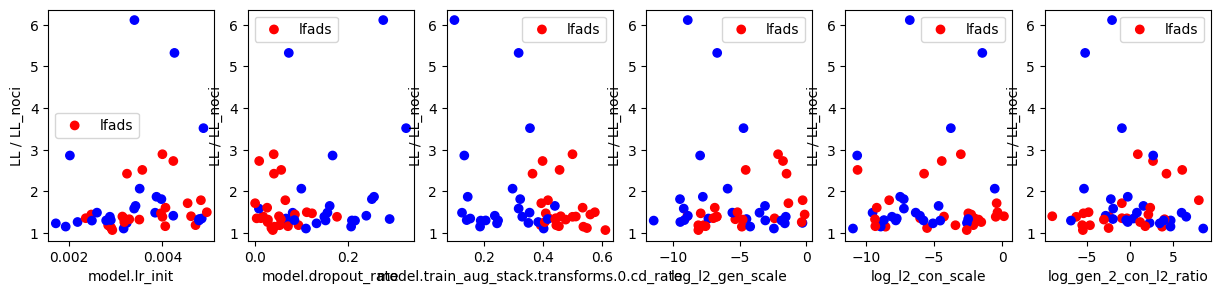

In [8]:
# plot ll ratio to ll_noci vs pbt_params
LLs['LL_ratio'] = LLs['LL'] / LLs['LL_noci']
# join with pbt_df
LLs_pbt = LLs.merge(pbt_df, on=['dataset','model','area'])
LLs_pbt['log_gen_2_con_l2_ratio'] = np.log(LLs_pbt['model.l2_gen_scale'] / LLs_pbt['model.l2_con_scale'])
LLs_pbt['log_l2_gen_scale'] = np.log(LLs_pbt['model.l2_gen_scale'])  
LLs_pbt['log_l2_con_scale'] = np.log(LLs_pbt['model.l2_con_scale'])
# plot
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
                'log_l2_gen_scale', 'log_l2_con_scale', "log_gen_2_con_l2_ratio"]

for i, param in enumerate(pbt_keys):
    # colorcode lfads vs band
    axes[i].scatter(LLs_pbt[param], LLs_pbt['LL_ratio'], c=LLs_pbt['model'].map({'lfads':'red', 'band':'blue'}))
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('LL / LL_noci')
    # axes[i].set_title(param)
    axes[i].legend(['lfads','band'])

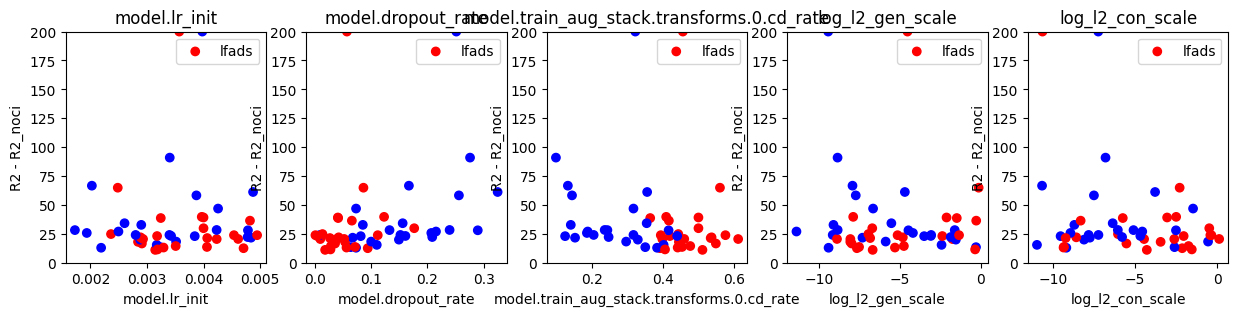

In [9]:
# plot R2 to noci R2 ratio against hyperparameters
R2s['R2_ratio'] = R2s['seq2seq from factors'] - R2s['seq2seq from factors no CI']
# join with pbt_df
R2s_pbt = R2s.merge(pbt_df, on=['dataset','model','area'])
R2s_pbt['log_l2_gen_scale'] = np.log(LLs_pbt['model.l2_gen_scale'])  
R2s_pbt['log_l2_con_scale'] = np.log(LLs_pbt['model.l2_con_scale'])
# plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
                'log_l2_gen_scale', 'log_l2_con_scale']

for i, param in enumerate(pbt_keys):
    # colorcode lfads vs band
    axes[i].scatter(R2s_pbt[param], np.clip(R2s_pbt['R2_ratio'],0,200), c=R2s_pbt['model'].map({'lfads':'red', 'band':'blue'}))
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('R2 - R2_noci')
    axes[i].set_title(param)
    axes[i].set_ylim([0,200])
    axes[i].legend(['lfads','band'])
    

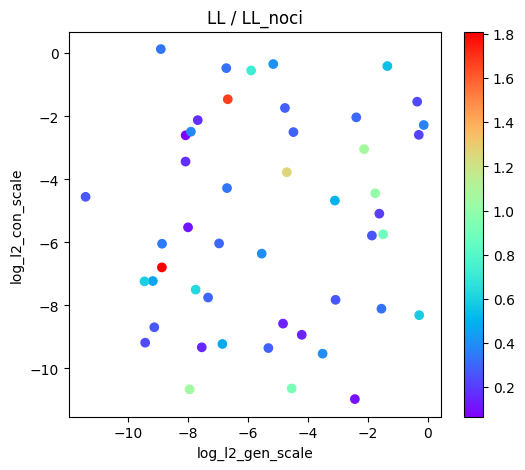

In [32]:
# plot LL/LL_noci as color on a log_l2_gen_scale to log_l2_con_scale plane
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
a = axes.scatter(LLs_pbt['log_l2_gen_scale'], LLs_pbt['log_l2_con_scale'], c=np.log(LLs_pbt['LL_ratio']), cmap='rainbow')
axes.set_xlabel('log_l2_gen_scale')
axes.set_ylabel('log_l2_con_scale')
axes.set_title('LL / LL_noci')
plt.colorbar(ax=axes,mappable=a)

In [33]:
LLs_pbt

,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area,LL_ratio,model.lr_init,model.dropout_rate,model.train_aug_stack.transforms.0.cd_rate,model.l2_gen_scale,model.l2_con_scale,log_gen_2_con_l2_ratio,log_l2_gen_scale,log_l2_con_scale
0,0.286996,0.205886,0.096752,0.066847,chewie_09_15,lfads,both,1.393954,0.003146,0.017983,0.511305,0.001232,0.013883,-2.421725,-6.698842,-4.277117
1,0.408792,0.149818,0.135474,0.073073,chewie_09_15,lfads,M1,2.728600,0.004232,0.009427,0.398135,0.174060,0.011761,2.694583,-1.748355,-4.442938
2,0.240038,0.202211,0.076562,0.063033,chewie_09_15,lfads,PMd,1.187068,0.004707,0.093789,0.391916,0.000464,0.119809,-5.554699,-7.676554,-2.121855
3,0.265879,0.214266,0.085831,0.063422,chewie_09_15,band,both,1.240883,0.003239,0.063466,0.349916,0.745725,0.075060,2.296073,-0.293399,-2.589472
4,0.363206,0.175986,0.117898,0.019033,chewie_09_15,band,M1,2.063834,0.003515,0.099931,0.295975,0.002760,0.579402,-5.346882,-5.892641,-0.545759
5,0.237210,0.187886,0.076082,0.060623,chewie_09_15,band,PMd,1.262525,0.002191,0.073034,0.383227,0.000080,0.000103,-0.250500,-9.432682,-9.182182
6,0.248500,0.209728,0.071518,0.061836,chewie_09_21,lfads,both,1.184867,0.002843,0.053400,0.444879,0.000308,0.032190,-4.648367,-8.084453,-3.436086
7,0.260633,0.103651,0.075773,0.026222,chewie_09_21,lfads,M1,2.514514,0.003571,0.056742,0.456056,0.010674,0.000024,6.095070,-4.539972,-10.635042
8,0.235642,0.210860,0.067213,0.061932,chewie_09_21,lfads,PMd,1.117531,0.002911,0.035647,0.549152,0.000335,0.003998,-2.479188,-8.001242,-5.522055
9,0.247225,0.155986,0.071035,0.048812,chewie_09_21,band,both,1.584925,0.003397,0.008836,0.316628,0.000104,0.000728,-1.950020,-9.175781,-7.225761
